In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2

In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
width = 1920#530#265
height = 1024#298#149

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

no            id   iso      class  label
0      1  DSCF0903.JPG   400  specialty      1
1      2  DSCF0900.JPG   800  specialty      1
2      3  DSCF0904.JPG  1250  specialty      1
3      4  DSCF0905.JPG   400  specialty      1
4      5  DSCF0910.JPG   800  specialty      1
..   ...           ...   ...        ...    ...
535  536  DSCF1724.JPG   800   exchange      3
536  537  DSCF1725.JPG  1250   exchange      3
537  538  DSCF1726.JPG   400   exchange      3
538  539  DSCF1727.JPG   800   exchange      3
539  540  DSCF1728.JPG  1250   exchange      3

[540 rows x 5 columns]

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  image_list.append(img)

label = dtLabel['label']

  0%|          | 1/540 [00:00<01:42,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECDA0>


  1%|          | 3/540 [00:00<01:42,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400F7BE80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECF60>


  1%|          | 5/540 [00:00<01:40,  5.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECCC0>


  1%|▏         | 7/540 [00:01<01:38,  5.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECD68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC7B8>


  2%|▏         | 9/540 [00:01<01:40,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECC88>


  2%|▏         | 10/540 [00:01<01:40,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECD68>


  2%|▏         | 12/540 [00:02<01:41,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECE48>


  3%|▎         | 14/540 [00:02<01:39,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECAC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECB38>


  3%|▎         | 16/540 [00:03<01:39,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC908>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECAC8>


  3%|▎         | 18/540 [00:03<01:39,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECCF8>


  4%|▎         | 20/540 [00:03<01:39,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECE80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC908>


  4%|▍         | 22/540 [00:04<01:38,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005EC4E0>


  4%|▍         | 24/540 [00:04<01:39,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECCF8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005ECCF8>


  5%|▍         | 26/540 [00:04<01:37,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F82B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8B70>


  5%|▌         | 28/540 [00:05<01:36,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F84A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8710>


  6%|▌         | 30/540 [00:05<01:38,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8FD0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F87B8>


  6%|▌         | 32/540 [00:06<01:36,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8668>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F86D8>


  6%|▋         | 34/540 [00:06<01:36,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8978>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8CC0>


  7%|▋         | 36/540 [00:06<01:37,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8B70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8438>


  7%|▋         | 38/540 [00:07<01:36,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F88D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8EF0>


  7%|▋         | 40/540 [00:07<01:33,  5.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8B70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8B70>


  8%|▊         | 42/540 [00:07<01:33,  5.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F85F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8080>


  8%|▊         | 44/540 [00:08<01:33,  5.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F85F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8F98>


  9%|▊         | 46/540 [00:08<01:33,  5.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8198>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F85F8>


  9%|▉         | 48/540 [00:09<01:33,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F86D8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8CF8>


  9%|▉         | 50/540 [00:09<01:33,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F88D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8438>


 10%|▉         | 52/540 [00:09<01:34,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8E48>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8AC8>


 10%|█         | 54/540 [00:10<01:34,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8128>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8AC8>


 10%|█         | 56/540 [00:10<01:33,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F88D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F88D0>


 11%|█         | 58/540 [00:11<01:31,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8080>


 11%|█         | 60/540 [00:11<01:31,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8080>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005F8080>


 11%|█▏        | 62/540 [00:11<01:29,  5.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602CC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602748>


 12%|█▏        | 64/540 [00:12<01:29,  5.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006027F0>


 12%|█▏        | 66/540 [00:12<01:30,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006022B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602AC8>


 13%|█▎        | 68/540 [00:12<01:30,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602CC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602A58>


 13%|█▎        | 70/540 [00:13<01:30,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602B38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602D30>


 13%|█▎        | 72/540 [00:13<01:30,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602198>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602198>


 14%|█▎        | 74/540 [00:14<01:27,  5.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602EB8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602FD0>


 14%|█▍        | 76/540 [00:14<01:26,  5.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602748>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602240>


 14%|█▍        | 78/540 [00:14<01:28,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602668>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602748>


 15%|█▍        | 80/540 [00:15<01:28,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006029B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006023C8>


 15%|█▌        | 82/540 [00:15<01:27,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602898>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006024A8>


 16%|█▌        | 84/540 [00:16<01:28,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006020B8>


 16%|█▌        | 85/540 [00:16<01:27,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602710>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602C50>


 16%|█▌        | 87/540 [00:16<01:27,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006024A8>


 16%|█▋        | 89/540 [00:16<01:26,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602E48>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602898>


 17%|█▋        | 91/540 [00:17<01:25,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006024A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006022B0>


 17%|█▋        | 93/540 [00:17<01:26,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006025C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006022B0>


 18%|█▊        | 95/540 [00:18<01:24,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006025C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602E80>


 18%|█▊        | 97/540 [00:18<01:23,  5.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400602E80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608DA0>


 18%|█▊        | 99/540 [00:18<01:24,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006085F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006087B8>


 19%|█▊        | 101/540 [00:19<01:23,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608710>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608128>


 19%|█▉        | 103/540 [00:19<01:22,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006087B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608828>


 19%|█▉        | 105/540 [00:20<01:25,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006080F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608E10>


 20%|█▉        | 107/540 [00:20<01:25,  5.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006089B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608C18>


 20%|██        | 109/540 [00:20<01:26,  5.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608198>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006086D8>


 20%|██        | 110/540 [00:21<01:26,  4.97it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006084E0>


 21%|██        | 112/540 [00:21<01:25,  4.98it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608898>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006087B8>


 21%|██        | 114/540 [00:21<01:24,  5.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608F98>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608CF8>


 21%|██▏       | 116/540 [00:22<01:22,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006087B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608F60>


 22%|██▏       | 118/540 [00:22<01:22,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006081D0>


 22%|██▏       | 120/540 [00:23<01:22,  5.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608358>


 23%|██▎       | 122/540 [00:23<01:20,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608A20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006084E0>


 23%|██▎       | 124/540 [00:23<01:20,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608CF8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608828>


 23%|██▎       | 126/540 [00:24<01:20,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608A20>


 24%|██▎       | 128/540 [00:24<01:18,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006084E0>


 24%|██▍       | 130/540 [00:24<01:18,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608B70>


 24%|██▍       | 132/540 [00:25<01:19,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006089E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608B70>


 25%|██▍       | 134/540 [00:25<01:18,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400608B70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006108D0>


 25%|██▌       | 136/540 [00:26<01:17,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610C88>


 26%|██▌       | 138/540 [00:26<01:19,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006101D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006105C0>


 26%|██▌       | 140/540 [00:26<01:17,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610518>


 26%|██▋       | 142/540 [00:27<01:17,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610D68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610A90>


 27%|██▋       | 144/540 [00:27<01:17,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006103C8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610C88>


 27%|██▋       | 146/540 [00:28<01:16,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006107B8>


 27%|██▋       | 148/540 [00:28<01:15,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610E48>


 28%|██▊       | 150/540 [00:28<01:14,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610588>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610EF0>


 28%|██▊       | 152/540 [00:29<01:13,  5.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610710>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610470>


 29%|██▊       | 154/540 [00:29<01:12,  5.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610EB8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006102E8>


 29%|██▉       | 156/540 [00:29<01:12,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610438>


 29%|██▉       | 158/540 [00:30<01:11,  5.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610C88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610EB8>


 30%|██▉       | 160/540 [00:30<01:10,  5.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006100F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610F60>


 30%|███       | 162/540 [00:31<01:11,  5.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006100F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610F60>


 30%|███       | 164/540 [00:31<01:10,  5.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610EB8>


 31%|███       | 166/540 [00:31<01:09,  5.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400610D68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006100F0>


 31%|███       | 168/540 [00:32<01:10,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006100F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006100F0>


 31%|███▏      | 170/540 [00:32<01:08,  5.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611C88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006115C0>


 32%|███▏      | 172/540 [00:32<01:08,  5.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611BA8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611CF8>


 32%|███▏      | 174/540 [00:33<01:08,  5.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611C88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611CF8>


 33%|███▎      | 176/540 [00:33<01:07,  5.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611AC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611898>


 33%|███▎      | 178/540 [00:34<01:07,  5.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611780>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006113C8>


 33%|███▎      | 180/540 [00:34<01:08,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611780>


 34%|███▎      | 182/540 [00:34<01:06,  5.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611198>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611828>


 34%|███▍      | 184/540 [00:35<01:06,  5.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611780>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611780>


 34%|███▍      | 186/540 [00:35<01:06,  5.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006117B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611CC0>


 35%|███▍      | 188/540 [00:35<01:04,  5.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611FD0>


 35%|███▌      | 190/540 [00:36<01:04,  5.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611CC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006114E0>


 36%|███▌      | 192/540 [00:36<01:04,  5.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611D30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611B00>


 36%|███▌      | 194/540 [00:37<01:03,  5.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611828>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006116A0>


 36%|███▋      | 196/540 [00:37<01:04,  5.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611F28>


 37%|███▋      | 198/540 [00:37<01:04,  5.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006116A0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611630>


 37%|███▋      | 200/540 [00:38<01:02,  5.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611B38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611400>


 37%|███▋      | 202/540 [00:38<01:02,  5.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611DD8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611198>


 38%|███▊      | 204/540 [00:38<01:02,  5.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400611518>


 38%|███▊      | 206/540 [00:39<01:01,  5.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E2E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E5F8>


 39%|███▊      | 208/540 [00:39<01:00,  5.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E128>


 39%|███▉      | 210/540 [00:39<01:01,  5.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E048>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E240>


 39%|███▉      | 212/540 [00:40<01:01,  5.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EB70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E048>


 40%|███▉      | 214/540 [00:40<01:00,  5.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EF28>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E4A8>


 40%|████      | 216/540 [00:41<01:01,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EEF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061ECC0>


 40%|████      | 218/540 [00:41<01:00,  5.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E080>


 41%|████      | 220/540 [00:41<01:00,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E780>


 41%|████      | 222/540 [00:42<01:01,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EF60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061ED30>


 41%|████▏     | 224/540 [00:42<01:00,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EC18>


 42%|████▏     | 226/540 [00:43<00:59,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EC88>


 42%|████▏     | 228/540 [00:43<01:00,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E240>


 43%|████▎     | 230/540 [00:43<00:59,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EB70>


 43%|████▎     | 232/540 [00:44<00:59,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EF28>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EC18>


 43%|████▎     | 234/540 [00:44<00:59,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E240>


 44%|████▎     | 236/540 [00:44<00:58,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E0B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061E828>


 44%|████▍     | 238/540 [00:45<00:58,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EC88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EF28>


 44%|████▍     | 240/540 [00:45<00:57,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061ED30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340061EC88>


 45%|████▍     | 242/540 [00:46<00:56,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620DD8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620358>


 45%|████▌     | 244/540 [00:46<00:55,  5.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620400>


 46%|████▌     | 246/540 [00:46<00:56,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620F28>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006208D0>


 46%|████▌     | 248/540 [00:47<00:54,  5.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620588>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620400>


 46%|████▋     | 250/540 [00:47<00:55,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006201D0>


 47%|████▋     | 252/540 [00:48<00:55,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006200F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C18>


 47%|████▋     | 254/540 [00:48<00:54,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006201D0>


 47%|████▋     | 256/540 [00:48<00:54,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620828>


 48%|████▊     | 258/540 [00:49<00:55,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006207B8>


 48%|████▊     | 260/540 [00:49<00:54,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620F98>


 49%|████▊     | 262/540 [00:49<00:54,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620898>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006204E0>


 49%|████▉     | 264/540 [00:50<00:54,  5.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620E48>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620E80>


 49%|████▉     | 266/540 [00:50<00:53,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006201D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620828>


 50%|████▉     | 268/540 [00:51<00:52,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620DD8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006205F8>


 50%|█████     | 270/540 [00:51<00:53,  5.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006201D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620400>


 50%|█████     | 272/540 [00:51<00:51,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34006205F8>


 51%|█████     | 274/540 [00:52<00:51,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620860>


 51%|█████     | 276/540 [00:52<00:51,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620E48>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F3400620C88>


 51%|█████▏    | 278/540 [00:53<00:50,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A9E8>


 52%|█████▏    | 280/540 [00:53<00:50,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AC88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA20>


 52%|█████▏    | 282/540 [00:53<00:50,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AF28>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A6A0>


 53%|█████▎    | 284/540 [00:54<00:49,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A2E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A1D0>


 53%|█████▎    | 286/540 [00:54<00:49,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA20>


 53%|█████▎    | 288/540 [00:55<00:49,  5.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A2B0>


 54%|█████▎    | 290/540 [00:55<00:48,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AEB8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA58>


 54%|█████▍    | 292/540 [00:55<00:47,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AD68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A080>


 54%|█████▍    | 294/540 [00:56<00:48,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AEF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A7F0>


 55%|█████▍    | 296/540 [00:56<00:47,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A9E8>


 55%|█████▌    | 298/540 [00:56<00:46,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A748>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A588>


 56%|█████▌    | 300/540 [00:57<00:46,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A4A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AF98>


 56%|█████▌    | 302/540 [00:57<00:45,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A2B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A6A0>


 56%|█████▋    | 304/540 [00:58<00:45,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A278>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA20>


 57%|█████▋    | 306/540 [00:58<00:45,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AB00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062ABA8>


 57%|█████▋    | 308/540 [00:58<00:44,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A748>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AB70>


 57%|█████▋    | 310/540 [00:59<00:44,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AA20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062A7F0>


 58%|█████▊    | 312/540 [00:59<00:44,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AB70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F340062AB70>


 58%|█████▊    | 314/540 [01:00<00:43,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFD68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF198>


 59%|█████▊    | 316/540 [01:00<00:43,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF0B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF198>


 59%|█████▉    | 318/540 [01:00<00:43,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF438>


 59%|█████▉    | 320/540 [01:01<00:42,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF588>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF9B0>


 60%|█████▉    | 322/540 [01:01<00:41,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF860>


 60%|██████    | 324/540 [01:01<00:42,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFBA8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF940>


 60%|██████    | 326/540 [01:02<00:40,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF1D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF9E8>


 61%|██████    | 328/540 [01:02<00:40,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFAC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF518>


 61%|██████    | 330/540 [01:03<00:40,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFC18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF8D0>


 61%|██████▏   | 332/540 [01:03<00:39,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFC18>


 62%|██████▏   | 334/540 [01:03<00:39,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF2E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF940>


 62%|██████▏   | 336/540 [01:04<00:38,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFF60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF2E8>


 63%|██████▎   | 338/540 [01:04<00:38,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFEB8>


 63%|██████▎   | 340/540 [01:05<00:37,  5.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF1D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF5F8>


 63%|██████▎   | 342/540 [01:05<00:38,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFF60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF860>


 64%|██████▎   | 344/540 [01:05<00:37,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF4A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF0B8>


 64%|██████▍   | 346/540 [01:06<00:37,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF978>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF1D0>


 64%|██████▍   | 348/540 [01:06<00:37,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AFB00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005AF0B8>


 65%|██████▍   | 350/540 [01:06<00:36,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7AC8>


 65%|██████▌   | 352/540 [01:07<00:36,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B70B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7358>


 66%|██████▌   | 354/540 [01:07<00:36,  5.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7780>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B76D8>


 66%|██████▌   | 356/540 [01:08<00:35,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7860>


 66%|██████▋   | 358/540 [01:08<00:34,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7A20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7940>


 67%|██████▋   | 360/540 [01:08<00:34,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7C18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7C88>


 67%|██████▋   | 362/540 [01:09<00:34,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B79B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7FD0>


 67%|██████▋   | 364/540 [01:09<00:33,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7A58>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7588>


 68%|██████▊   | 366/540 [01:10<00:33,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B75C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7CF8>


 68%|██████▊   | 368/540 [01:10<00:32,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7278>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B79E8>


 69%|██████▊   | 370/540 [01:10<00:32,  5.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7588>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7278>


 69%|██████▉   | 372/540 [01:11<00:32,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B77B8>


 69%|██████▉   | 374/540 [01:11<00:31,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B77F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7D68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7B38>


 70%|██████▉   | 376/540 [01:11<00:31,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7A58>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B70F0>


 70%|███████   | 378/540 [01:12<00:31,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7AC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7518>


 70%|███████   | 380/540 [01:12<00:30,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7908>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7B38>


 71%|███████   | 382/540 [01:13<00:30,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7D68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B72B0>


 71%|███████   | 384/540 [01:13<00:30,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7B38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005B7B38>


 71%|███████▏  | 386/540 [01:13<00:29,  5.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC048>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCCF8>


 72%|███████▏  | 388/540 [01:14<00:28,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCE10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCDA0>


 72%|███████▏  | 390/540 [01:14<00:29,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCEF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCE10>


 73%|███████▎  | 392/540 [01:15<00:28,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCEF0>


 73%|███████▎  | 394/540 [01:15<00:28,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCE10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCB70>


 73%|███████▎  | 396/540 [01:15<00:28,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC630>


 74%|███████▎  | 397/540 [01:15<00:27,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC9B0>


 74%|███████▍  | 399/540 [01:16<00:27,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC4E0>


 74%|███████▍  | 401/540 [01:16<00:26,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC080>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC4E0>


 75%|███████▍  | 403/540 [01:17<00:26,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCBA8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC518>


 75%|███████▌  | 405/540 [01:17<00:25,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC8D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCBE0>


 75%|███████▌  | 407/540 [01:17<00:25,  5.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCBA8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC048>


 76%|███████▌  | 409/540 [01:18<00:25,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCBE0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCD30>


 76%|███████▌  | 411/540 [01:18<00:25,  5.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCF28>


 76%|███████▋  | 413/540 [01:19<00:25,  5.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCDD8>


 77%|███████▋  | 415/540 [01:19<00:25,  4.98it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCDD8>


 77%|███████▋  | 417/540 [01:19<00:24,  5.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCD30>


 78%|███████▊  | 419/540 [01:20<00:23,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BCE80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC9B0>


 78%|███████▊  | 421/540 [01:20<00:23,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005BC9B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6400>


 78%|███████▊  | 423/540 [01:21<00:22,  5.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6F28>


 79%|███████▊  | 425/540 [01:21<00:22,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6940>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C64A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6D68>


 79%|███████▉  | 427/540 [01:21<00:22,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C67F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6518>


 79%|███████▉  | 429/540 [01:22<00:21,  5.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C60B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C65C0>


 80%|███████▉  | 431/540 [01:22<00:20,  5.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6748>


 80%|████████  | 433/540 [01:22<00:20,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6B00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C61D0>


 81%|████████  | 435/540 [01:23<00:20,  5.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6C88>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6B38>


 81%|████████  | 437/540 [01:23<00:20,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6E48>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6CF8>


 81%|████████▏ | 439/540 [01:24<00:19,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6B38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6940>


 82%|████████▏ | 441/540 [01:24<00:19,  5.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6BA8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6B38>


 82%|████████▏ | 443/540 [01:24<00:18,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C62B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6668>


 82%|████████▏ | 445/540 [01:25<00:18,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C60F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C69B0>


 83%|████████▎ | 447/540 [01:25<00:18,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6898>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C62E8>


 83%|████████▎ | 449/540 [01:26<00:17,  5.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C69B0>


 84%|████████▎ | 451/540 [01:26<00:17,  5.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6E10>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6FD0>


 84%|████████▍ | 453/540 [01:26<00:17,  5.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C69B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C6FD0>


 84%|████████▍ | 455/540 [01:27<00:16,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C69B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C65F8>


 85%|████████▍ | 457/540 [01:27<00:15,  5.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005C65F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA668>


 85%|████████▌ | 459/540 [01:28<00:15,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAA90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAB00>


 85%|████████▌ | 461/540 [01:28<00:15,  5.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA828>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA898>


 86%|████████▌ | 463/540 [01:28<00:14,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAD30>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CADA0>


 86%|████████▌ | 465/540 [01:29<00:14,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA7F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAD30>


 86%|████████▋ | 467/540 [01:29<00:14,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAAC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA4A8>


 87%|████████▋ | 469/540 [01:30<00:13,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA550>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA550>


 87%|████████▋ | 471/540 [01:30<00:13,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAD68>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CACC0>


 88%|████████▊ | 473/540 [01:30<00:12,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA828>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA0F0>


 88%|████████▊ | 475/540 [01:31<00:12,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA518>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAEF0>


 88%|████████▊ | 477/540 [01:31<00:12,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAF60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA630>


 89%|████████▊ | 479/540 [01:31<00:11,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA240>


 89%|████████▉ | 481/540 [01:32<00:11,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA128>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA518>


 89%|████████▉ | 483/540 [01:32<00:11,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CABA8>


 90%|████████▉ | 485/540 [01:33<00:10,  5.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAB38>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA240>


 90%|█████████ | 487/540 [01:33<00:10,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA898>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAB38>


 91%|█████████ | 489/540 [01:33<00:09,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAB70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAF98>


 91%|█████████ | 491/540 [01:34<00:09,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CAEF0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA1D0>


 91%|█████████▏| 493/540 [01:34<00:09,  5.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005CA1D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1DD8>


 92%|█████████▏| 495/540 [01:35<00:08,  5.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1C18>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1080>


 92%|█████████▏| 497/540 [01:35<00:08,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1AC8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1160>


 92%|█████████▏| 499/540 [01:35<00:07,  5.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D10F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D11D0>


 93%|█████████▎| 501/540 [01:36<00:07,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D10B8>


 93%|█████████▎| 503/540 [01:36<00:07,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D17F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1978>


 94%|█████████▎| 505/540 [01:37<00:06,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1F98>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1A90>


 94%|█████████▍| 507/540 [01:37<00:06,  5.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1F60>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D11D0>


 94%|█████████▍| 509/540 [01:37<00:06,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1748>


 95%|█████████▍| 511/540 [01:38<00:05,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1048>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D16A0>


 95%|█████████▌| 513/540 [01:38<00:05,  5.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D14A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1F28>


 95%|█████████▌| 515/540 [01:38<00:04,  5.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D10B8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D19E8>


 96%|█████████▌| 517/540 [01:39<00:04,  5.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1B70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1FD0>


 96%|█████████▌| 519/540 [01:39<00:04,  5.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D14A8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1B70>


 96%|█████████▋| 521/540 [01:40<00:03,  5.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1CF8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1EF0>


 97%|█████████▋| 524/540 [01:40<00:03,  5.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D13C8>


 97%|█████████▋| 526/540 [01:41<00:02,  5.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1B70>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D13C8>


 98%|█████████▊| 528/540 [01:41<00:02,  5.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1DA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D1B00>


 98%|█████████▊| 530/540 [01:41<00:01,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D13C8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D50B8>


 99%|█████████▊| 532/540 [01:42<00:01,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5DA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D50B8>


 99%|█████████▉| 534/540 [01:42<00:01,  5.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5A58>


 99%|█████████▉| 536/540 [01:43<00:00,  5.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D57F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5C88>


100%|█████████▉| 538/540 [01:43<00:00,  5.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5828>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5128>


100%|██████████| 540/540 [01:43<00:00,  5.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F34005D5320>


In [0]:
# label = np.concatenate((label), axis=0)
# label

In [0]:
Y = label

In [0]:
len(label)

540

In [0]:
len(image_list)

540

In [0]:
image_list

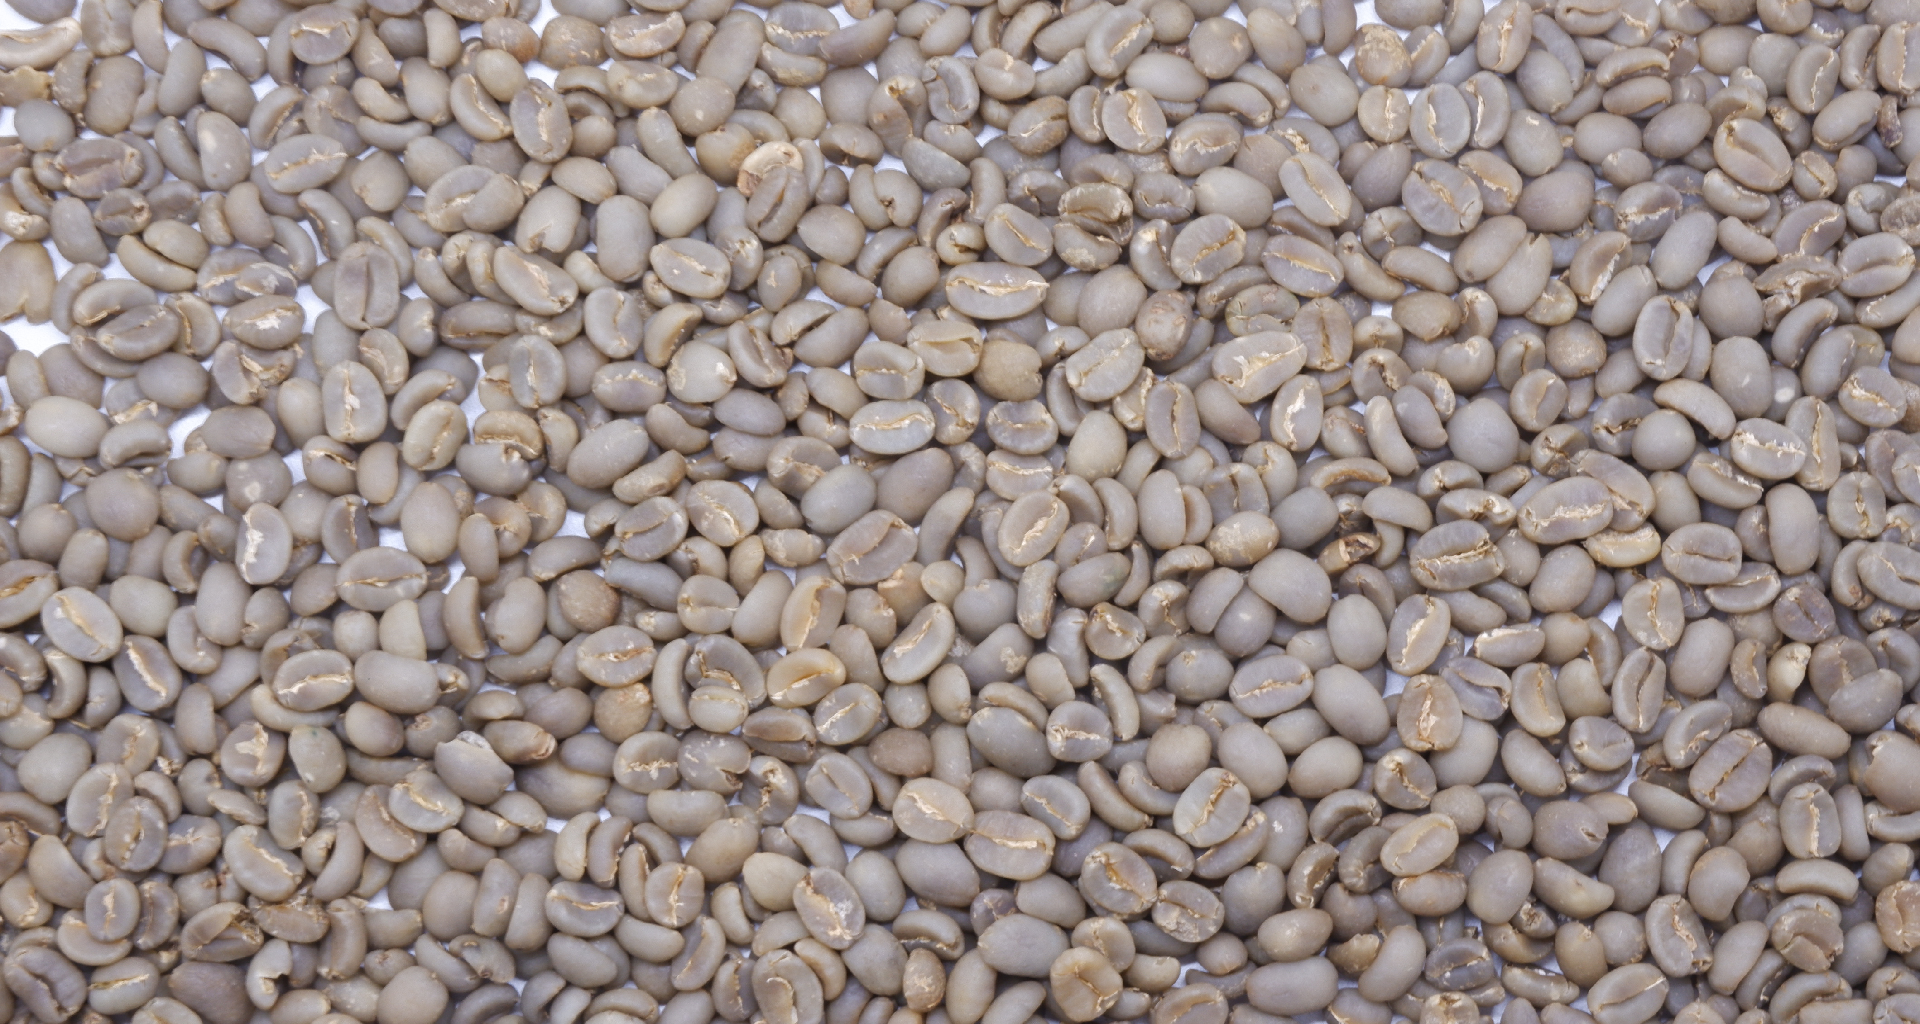

In [0]:
from IPython.display import Image as Img

display(image_list[60])
#print('')
#display(image_list[300])
#print('')
#display(image_list[499])
#print('')

In [0]:
img_crop = image_list
len(img_crop)

540

In [0]:
def get_random_crop(img_crop, crop_width, crop_height, dimension):
  
  crop = []
  coor = []

  for img in img_crop:
    img = np.array(img)
    # For untuk random crop sebanyak N
    max_x = img.shape[1] - crop_width
    max_y = img.shape[0] - crop_height

    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)
    coor.append([x,y])
    crop.append(img[y: y + crop_height, x: x + crop_width, :])

  return crop, coor

In [0]:
img_crop = np.random.randint(0, 256, (1920, 1024, 3))
random_crop, random_coor = get_random_crop(image_list, 720, 480, 3)

In [0]:
img_crop.shape

(1920, 1024, 3)

In [0]:
from IPython.display import Image as Img

from matplotlib import pyplot as plt

len(random_crop)

540

In [0]:
np.array(random_crop).shape

(540, 480, 720, 3)

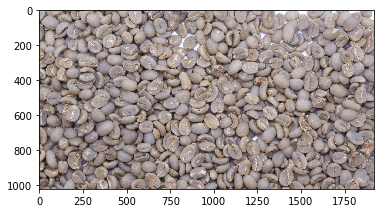

In [0]:
plt.imshow(image_list[50])

[633, 101]


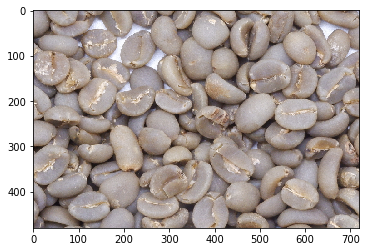

In [0]:
plt.imshow(random_crop[50])
print(random_coor[50])

#display(random_crop[539])

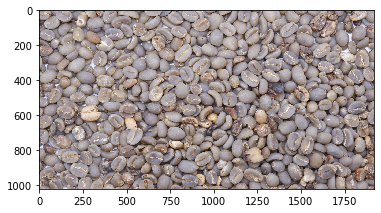

In [0]:
plt.imshow(image_list[400])

[1002, 210]


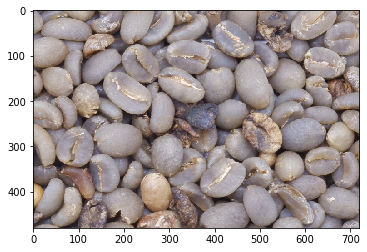

In [0]:
plt.imshow(random_crop[400])
print(random_coor[400])

# Grayscaling

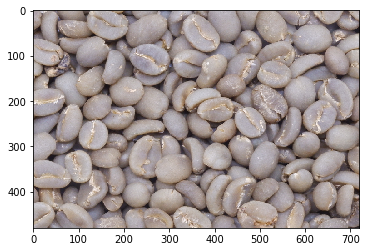

In [0]:
img_gray = random_crop
plt.imshow(img_gray[10])

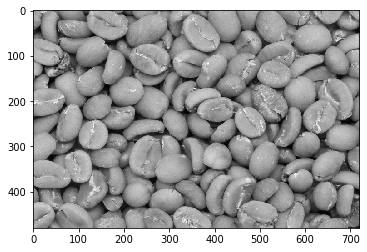

In [0]:
#coba grayscalling
gray = cv2.cvtColor(img_gray[10], cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#tinggal buat ke array

In [0]:
# #def rgb2gray(rgb,img_gray):

# grayscaling = []
# for gray in img_gray:
#   gray2 = np.array(gray)
#   gray2 = cv2.cvtColor(gray2, cv2.COLOR_BGR2GRAY)
#   grayscaling.append(gray2)
  


In [0]:
np.array(img_gray).shape

(540, 480, 720, 3)

In [0]:
def get_grayscale(img_gray):

  grayscale = []
  
  for img in img_gray:
    # img = np.array(img)
    gray = cv2.cvtColor(img_gray[img], cv2.COLOR_BGR2GRAY)
    grayscale.append(gray)
  
  return grayscale


In [0]:
#perulangan grayscalling, dengan loop
# coba buat dengan menggunakan procedur

# for grey2 in range(len(img_gray)):
#  img_gray[grey2] = cv2.cvtColor(img_gray[grey2], cv2.COLOR_BGR2GRAY)

grayscaling = get_grayscale(img_gray)


TypeError: ignored

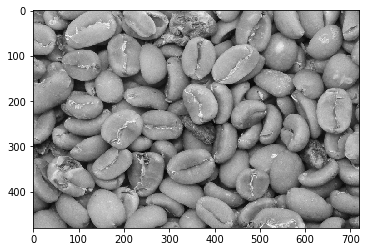

In [0]:
plt.imshow(img_gray[20], cmap = 'gray')
print('')


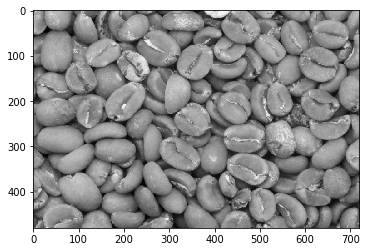

In [0]:
plt.imshow(img_gray[300], cmap = 'gray')